In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-white')

from sklearn.metrics import classification_report, mean_squared_error
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier

In [2]:
import json
with open("df_1hour_Feb.json", 'r', encoding='UTF-8') as f:
    F_data = json.load(f)

In [3]:
with open("df_1hour_Mar.json", 'r', encoding='UTF-8') as f:
    M_data = json.load(f)

In [4]:
COLUMNS = ['name', 'code', 'time', 'price', 'time_1', 'price_1', 'price_dif_1', 'sell_1', 'buy_1', 'volume_1', 'variation_1', 'post_num_1', 'unique_id_1', 'click_1', 'like_1', 'dislike_1', 'time_2', 'price_2', 'price_dif_2', 'sell_2', 'buy_2', 'volume_2', 'variation_2', 'post_num_2', 'unique_id_2', 'click_2', 'like_2', 'dislike_2', 'time_3', 'price_3', 'price_dif_3', 'sell_3', 'buy_3', 'volume_3', 'variation_3', 'post_num_3', 'unique_id_3', 'click_3', 'like_3', 'dislike_3', 'mkt_cap', 'kospi', 'kosdaq', 'trash', 'yesterday_closing_price', 'is_maximum', 'is_minimum', 'price_volatility', 'price_trend', 'average_price_volatility', 'sell_minus_buy_1', 'sell_minus_buy_2', 'sell_minus_buy_3', 'is_price_gap_stable', 'price_gap_volatility', 'is_like_higher', 'volume_trend', 'post_num_trend', 'unique_id_trend', 'click_trend', 'price_increase', 'did_price_increase', 'did_price_033', 'did_price_100', 'did_price_150', 'kospi_ind', 'kosdaq_ind', 'time_slot', 'ko_inter', 'early_mor', 'morning', 'lunch', 'afternoon', 'late', 'mkt_change', 'alpha', 'per_now', 'kospi_1', 'kospi_2', 'kospi_3', 'kospi_answer', 'kosdaq_1', 'kosdaq_2', 'kosdaq_3', 'kosdaq_answer', 'kospi_trend', 'kosdaq_trend', 'kospi_increase', 'kosdaq_increase', 'market_increase', 'did_opening_price_increase', 'price_1_sq', 'price_dif_1_sq', 'sell_1_sq', 'buy_1_sq', 'volume_1_sq', 'variation_1_sq', 'post_num_1_sq', 'unique_id_1_sq', 'click_1_sq', 'like_1_sq', 'dislike_1_sq', 'price_2_sq', 'price_dif_2_sq', 'sell_2_sq', 'buy_2_sq', 'volume_2_sq', 'variation_2_sq', 'post_num_2_sq', 'unique_id_2_sq', 'click_2_sq', 'like_2_sq', 'dislike_2_sq', 'price_3_sq', 'price_dif_3_sq', 'sell_3_sq', 'buy_3_sq', 'volume_3_sq', 'variation_3_sq', 'post_num_3_sq', 'unique_id_3_sq', 'click_3_sq', 'like_3_sq', 'dislike_3_sq', 'mkt_cap_sq', 'yesterday_closing_price_sq', 'price_volatility_sq', 'price_trend_sq', 'average_price_volatility_sq', 'sell_minus_buy_1_sq', 'sell_minus_buy_2_sq', 'sell_minus_buy_3_sq', 'price_gap_volatility_sq', 'volume_trend_sq', 'post_num_trend_sq', 'unique_id_trend_sq', 'click_trend_sq', 'kospi_ind_sq', 'kosdaq_ind_sq', 'time_slot_sq', 'ko_inter_sq', 'mkt_change_sq', 'alpha_sq', 'per_now_sq', 'kospi_1_sq', 'kospi_2_sq', 'kospi_3_sq', 'kosdaq_1_sq', 'kosdaq_2_sq', 'kosdaq_3_sq', 'kospi_trend_sq', 'kosdaq_trend_sq']

In [5]:
df_F = pd.DataFrame(F_data, columns = COLUMNS)
df_M = pd.DataFrame(M_data, columns = COLUMNS)
df = pd.concat([df_F, df_M])

In [6]:
df = df.dropna(axis=0, how='any')

In [7]:
time_filter = (df['time'].str.startswith("2018-02-21")) | \
              (df['time'].str.startswith("2018-02-20")) | \
              (df['time'].str.startswith("2018-02-14")) 
        
train_df = df[time_filter].reset_index(drop = True)
test_df = df[~time_filter].reset_index(drop = True)

In [9]:
X_COL = ['price_1','price_dif_1','sell_1','buy_1','volume_1','variation_1','post_num_1','unique_id_1','click_1',
     'like_1','dislike_1','price_2','price_dif_2','sell_2','buy_2','volume_2','variation_2','post_num_2','unique_id_2',
     'click_2','like_2','dislike_2','price_3','price_dif_3','sell_3','buy_3','volume_3','variation_3','post_num_3',
     'unique_id_3','click_3','like_3','dislike_3','mkt_cap','kospi','kosdaq','trash','yesterday_closing_price',
     'is_maximum','is_minimum','price_volatility','price_trend','average_price_volatility','sell_minus_buy_1',
     'sell_minus_buy_2','sell_minus_buy_3','is_price_gap_stable','price_gap_volatility','is_like_higher',
     'volume_trend','post_num_trend','unique_id_trend','click_trend','kospi_ind','kosdaq_ind','time_slot',
     'ko_inter','early_mor','morning','lunch','afternoon','late','mkt_change','alpha','per_now','kospi_1','kospi_2',
     'kospi_3','kosdaq_1','kosdaq_2','kosdaq_3','kospi_trend','kosdaq_trend','did_opening_price_increase',
     'price_1_sq','price_dif_1_sq','sell_1_sq','buy_1_sq','volume_1_sq','variation_1_sq','post_num_1_sq',
     'unique_id_1_sq','click_1_sq','like_1_sq','dislike_1_sq','price_2_sq','price_dif_2_sq','sell_2_sq',
     'buy_2_sq','volume_2_sq','variation_2_sq','post_num_2_sq','unique_id_2_sq','click_2_sq','like_2_sq',
     'dislike_2_sq','price_3_sq','price_dif_3_sq','sell_3_sq','buy_3_sq','volume_3_sq','variation_3_sq',
     'post_num_3_sq','unique_id_3_sq','click_3_sq','like_3_sq','dislike_3_sq','mkt_cap_sq',
     'yesterday_closing_price_sq','price_volatility_sq','price_trend_sq','average_price_volatility_sq',
     'sell_minus_buy_1_sq','sell_minus_buy_2_sq','sell_minus_buy_3_sq','price_gap_volatility_sq',
     'volume_trend_sq','post_num_trend_sq','unique_id_trend_sq','click_trend_sq','kospi_ind_sq','kosdaq_ind_sq',
     'time_slot_sq','ko_inter_sq','mkt_change_sq','alpha_sq','per_now_sq','kospi_1_sq','kospi_2_sq','kospi_3_sq',
     'kosdaq_1_sq','kosdaq_2_sq','kosdaq_3_sq','kospi_trend_sq','kosdaq_trend_sq']

In [10]:
X = df[X_COL]
y = df['did_price_033']
X_train = train_df[X_COL]
X_test = test_df[X_COL]
y_train = train_df['did_price_033']
y_test = test_df['did_price_033']
y_test_in = test_df['price_increase']

In [11]:
X_test.shape

(8171, 135)

Random Forest

In [12]:
def get_best_feature(num):
    rv = 0
    f_num = 1
    for i in range(1, num):
        tree_random = RandomForestClassifier(n_estimators = 100, \
                      max_features = i, bootstrap = True,\
                      oob_score = True, random_state = 0)
        tree_random.fit(X_train, y_train)
        y_pred = tree_random.predict(X_test)
        y_port = y_test_in[y_pred == 1]
        avg = y_port.mean()
        if avg > rv:
            f_num = i
            rv = avg
        print(f_num)
        
    return f_num

In [13]:
get_best_feature(135)

1
1
3
3
3
3
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7


7

In [58]:
tree_random = RandomForestClassifier(n_estimators = 100, max_features = 7, \
                                     bootstrap = True, oob_score = True, 
                                     random_state = 25)
tree_random.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=7, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=True, random_state=25, verbose=0, warm_start=False)

In [59]:
y_pred = tree_random.predict(X_test)

In [60]:
y_test_in.mean()

-0.10686910975723904

In [61]:
y_port_rf = y_test_in[y_pred == 1]
y_port_rf.mean()

0.14820149088654425

In [62]:
y_port.shape

(56,)

In [63]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.79      0.97      0.87      6401
          1       0.38      0.07      0.12      1770

avg / total       0.70      0.77      0.71      8171



In [64]:
RF_mod = pd.DataFrame(y_pred, columns = ['RF'])
RF_mod['RF'].value_counts()

0    7844
1     327
Name: RF, dtype: int64

In [65]:
RF_mod.to_json('RF_mod.json', orient='values')

In [21]:
FEATURES = X.columns

In [22]:
importances = tree_random.feature_importances_  
ranks = np.argsort(importances)[::-1] 
for f in range(X.shape[1]):
    print(f + 1, ". ", FEATURES[ranks[f]], ": ", importances[ranks[f]])

1 .  alpha :  0.016754185561
2 .  per_now :  0.0152127410893
3 .  time_slot_sq :  0.014952941544
4 .  time_slot :  0.0144102430914
5 .  alpha_sq :  0.0143290948525
6 .  average_price_volatility :  0.0137525320047
7 .  volume_2 :  0.012962617573
8 .  mkt_change :  0.0127736446362
9 .  price_dif_3 :  0.0126134322269
10 .  volume_2_sq :  0.012439765151
11 .  per_now_sq :  0.0122582516645
12 .  volume_3 :  0.0120549696198
13 .  price_volatility_sq :  0.0117986679516
14 .  price_volatility :  0.0117137440389
15 .  volume_3_sq :  0.0116228606539
16 .  volume_1_sq :  0.0114542529146
17 .  volume_trend_sq :  0.0113574572532
18 .  click_3 :  0.0113534302803
19 .  volume_1 :  0.0107409999929
20 .  mkt_change_sq :  0.0107238211819
21 .  kospi_3_sq :  0.0106721450924
22 .  variation_2_sq :  0.0106470423982
23 .  variation_1 :  0.0103521463836
24 .  variation_2 :  0.0101851219159
25 .  kosdaq_ind :  0.0101850766851
26 .  click_2 :  0.0101444612735
27 .  price_3 :  0.0100692796354
28 .  kospi_3 :  0

Bagging

In [40]:
def get_best_bag(num):
    rv = 0
    f_num = 1
    for i in range(1, num):
        bag_tree = BaggingClassifier(n_estimators = 500, max_features = i, \
                                     bootstrap = True, oob_score = True, \
                                     random_state = 0)
        bag_tree.fit(X_train, y_train)
        y_pred = bag_tree.predict(X_test)
        y_port = y_test_in[y_pred == 1]
        avg = y_port.mean()
        if avg > rv:
            f_num = i
            rv = avg
        print(f_num)
        
    return f_num

In [41]:
get_best_bag(136)

1
1
1
1
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5


KeyboardInterrupt: 

In [66]:
bag_tree = BaggingClassifier(n_estimators = 100, max_features = 5, bootstrap = True,\
                             oob_score = True, random_state = 0)
bag_tree.fit(X_train, y_train)

BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=5, max_samples=1.0,
         n_estimators=100, n_jobs=1, oob_score=True, random_state=0,
         verbose=0, warm_start=False)

In [67]:
y_pred = bag_tree.predict(X_test)
y_port = y_test_in[y_pred == 1]
y_port.mean()

0.15415308191212115

In [69]:
Bagging_mod = pd.DataFrame(y_pred, columns = ['Bag'])
Bagging_mod['Bag'].value_counts()

0    8105
1      66
Name: Bag, dtype: int64

In [71]:
Bagging_mod.to_json('Bagging_mod.json', orient='values')

In [70]:
y_test_in.mean()

-0.10686910975723904

Boosting

In [72]:
boost = GradientBoostingClassifier(n_estimators = 500, learning_rate = 0.01, \
                                   max_depth = 2, random_state=1)
boost.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=2,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=500,
              presort='auto', random_state=1, subsample=1.0, verbose=0,
              warm_start=False)

In [74]:
y_pred = boost.predict(X_test)
y_port = y_test_in[y_pred == 1]

In [75]:
y_port.mean() #no change

0.057797239794642845

In [53]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.78      1.00      0.88      6401
          1       0.45      0.01      0.03      1770

avg / total       0.71      0.78      0.69      8171



kosdaq_trend_sq               0.000000
dislike_2_sq                  0.000000
kospi                         0.000000
kosdaq_trend                  0.000000
trash                         0.000000
is_maximum                    0.000000
is_minimum                    0.000000
price_trend                   0.000000
post_num_2_sq                 0.000000
sell_minus_buy_3              0.000000
is_price_gap_stable           0.000000
dislike_1_sq                  0.000000
is_like_higher                0.000000
post_num_trend                0.000000
unique_id_trend               0.000000
kospi_ind                     0.000000
variation_1_sq                0.000000
volume_1_sq                   0.000000
early_mor                     0.000000
morning                       0.000000
lunch                         0.000000
afternoon                     0.000000
late                          0.000000
did_opening_price_increase    0.000000
kospi_2                       0.000000
kospi_trend_sq           

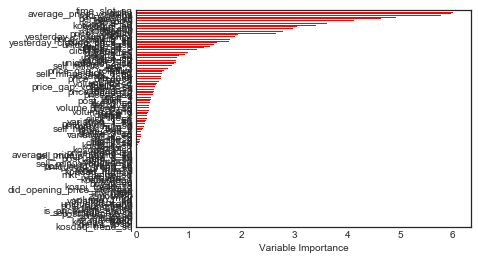

In [54]:
feature_importance = boost.feature_importances_*100
rel_imp = pd.Series(feature_importance, index = X.columns).sort_values(inplace=False)
print(rel_imp)
rel_imp.T.plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

In [55]:
cut_var = rel_imp[rel_imp > 0]

In [56]:
X_train_sub = X_train[cut_var.index]
X_test_sub = X_test[cut_var.index]

In [57]:
cut_var

kosdaq_1                      0.000809
kosdaq_1_sq                   0.000841
kospi_1                       0.001425
kospi_1_sq                    0.002029
dislike_1                     0.029647
click_2_sq                    0.051493
like_2_sq                     0.070748
dislike_2                     0.072520
sell_1_sq                     0.073184
like_2                        0.090259
variation_2_sq                0.090572
dislike_3_sq                  0.091749
unique_id_1                   0.095472
sell_2                        0.109276
sell_minus_buy_2              0.126095
post_num_2                    0.135086
unique_id_1_sq                0.151779
post_num_1_sq                 0.159161
variation_3_sq                0.163310
price_1_sq                    0.178576
click_1_sq                    0.201803
like_1                        0.202944
price_2                       0.203822
dislike_3                     0.205376
price_1                       0.227246
volume_trend             